In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
from scipy.special import comb,binom
from numpy.random import uniform
from math import floor
from scipy.integrate import quad
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### Question 1
What makes a good feature? Explain with illustrative figures and rationale.\


#### Answer:
A good feature will help you discriminate categories easily. In other words, we should easily discriminate one class from another using that feature. For example,  classifying whether a patientic is diabetic or not, body mass index of a patient is a good feature but  his\her gender is not. 
 

### Question 2
Write the formula for covariance matrix and explain the meaning of diagonal and off-diagonal terms\


#### Answer
Given a a feature matrix $X$ with dimension $n\times d$, where $n$ is number of features and $d$ is number of samples,\
Covariance matrix is given by this equation:\
$COV(X)=\frac{1}{n-1}\sum_{i=1}^{n}(X-\mu)(X-\mu)^T$ where $\mu$ is the mean vector
1. Digonal values of covariance matrix show us the variances of features or the spread within individual features
2. Off-diagonal values give the covariance between two features. In other words, off-diagonal values tell us how much one feature changes with respect to another.

## Question 3
What are the important properties of principal components? What is the interpretation of the first principal component? Draw some examples of data distribution in which PCA may not be useful. \

### Answer
$1.$ Properties of principal components(PCs):
* Principalm components are othognal to each other
* Pcs are linear combination of initial variables or features
* The variation captured by PCs decreases from the fisrt PC to the last (First PC has the highest eigen value)\

$2.$ The first PC capture the greatest amount variation((variance) in the data.


In [53]:

candy_data=  pd.read_csv("candy.csv")
print("Data shape = ", candy_data.shape,"\n\n",candy_data.head())
scaler= MinMaxScaler()
candy_data=candy_data.drop(["Name"],axis=1)

data=pd.DataFrame(scaler.fit_transform(candy_data))
print("\nNormalized candy daya: \n",data[0:10])

Data shape =  (38, 7) 

            Name  Calories   Fat  Satfat  Carbs  Sugar  Sodium
0     100 Grand       190   8.0     5.0   30.0   22.0    90.0
1  3 Musketeers       240   7.0     5.0   42.0   36.0    90.0
2    5th Avenue       260  12.0     5.0   38.0   29.0   120.0
3    Almond Joy       220  13.0     8.0   26.0   20.0    50.0
4   Andes Mints       200  13.0    11.0   22.0   20.0    20.0

Normalized candy daya: 
           0         1         2      3      4         5
0  0.000000  0.307692  0.294118  0.400  0.200  0.473573
1  0.384615  0.230769  0.294118  0.880  0.760  0.473573
2  0.538462  0.615385  0.294118  0.720  0.480  0.631501
3  0.230769  0.692308  0.647059  0.240  0.120  0.263003
4  0.076923  0.692308  1.000000  0.080  0.120  0.105075
5  0.653846  0.692308  0.529412  0.760  0.600  0.726258
6  0.615385  0.538462  0.411765  0.920  0.480  0.710465
7  0.538462  0.815385  0.776471  0.316  0.432  0.000000
8  0.307692  0.153846  0.235294  0.920  0.520  0.157717
9  0.230769  0.69

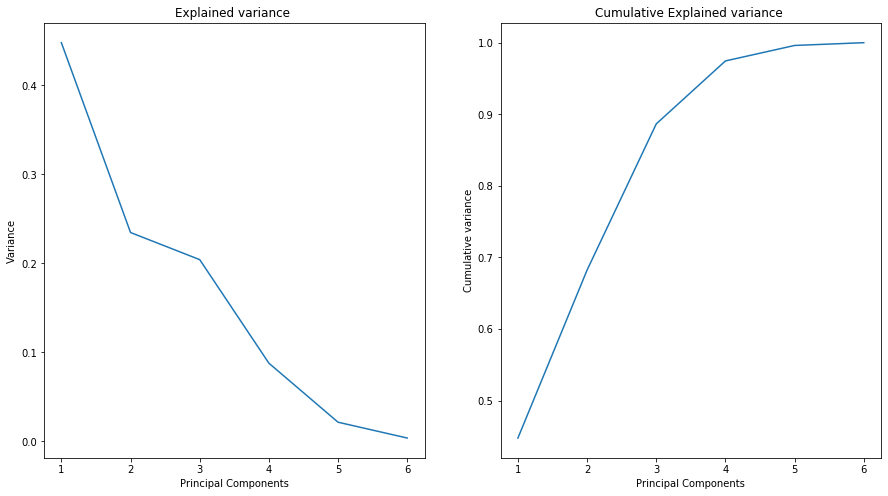

In [80]:
pca= PCA(n_components=data.shape[1])
data_pca= pca.fit_transform(data)
var=pca.explained_variance_ratio_ # Variance corresponding to each individual component
cumulative_var= []

pcs=list(range(1,len(var)+1))
for i in range(0,len(var)):
    if i == 0:
        cumulative_var.append(pca.explained_variance_ratio_[i])
    else:
        cumulative_var.append(pca.explained_variance_ratio_[i] + 
                                 cumulative_var[i-1])
fig=plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(pcs, var)
plt.xlabel('Principal Components'),plt.ylabel('Variance'),plt.title("Explained variance ")
plt.subplot(122)
plt.plot(pcs, cumulative_var)
plt.xlabel('Principal Components'),plt.ylabel('Cumulative variance'),plt.title("Cumulative Explained variance ")
plt.show()


In [68]:
list(range(1,5))

[1, 2, 3, 4]

### Question 4
Define within-class scatter and between-class scatter matrices. Explain what types of projections are obtained using Linear Discrimination Analysis (LDA)


#### Answer:
* Within-class scatter matrix contains covariances from indivdual classes and it captures variance or spead within classes. it's given by the following equation:\

$SW= \sum_{i=1}^{C}Si$, where:\
$Si= \sum_{i}^{n}(x-mi)(x-mi)^T$ where mi: mean of class i

* Between class scatter matrix contains covariance between classes and it captures variance betweenclasses. Between-class scatter is given by the following equation:\

$SB=\sum_{i}^{C}Ni(mi-m)(mi-m)^T$ where m is overall mean of the dataset and mi is sample mean of each class , and Ni is sample size of each class

* LDA projects the data points into new space (lower dimesnion) which maximises the between-class separability while minimising their within-class variability. Therefore, LDA can even be used for classfication.



### Question 5
Which Gaussian distribution contains more information, the one with large variance or the one with small variance? Justify your answer.\


#### Answer:
Large variance means large variability in the data. Variance reflects the degree of spread in the data set. The more spread the data, the larger the variance is in relation to the mean. When variance is small, it means that most of the data is concentrated around the mean and we can pretty make decision on our dataset based on the mean information.
Thefore, high variance Gausian distribution will give us more information compared to the one with low variance.

## Question 6
Let’s say your football team is playing a series of 5 games against your opponent. Whoever winsmore games (out of 5) wins the title. Let us say, your team might is more skilled and has 75%chances of winning. So, there is a 25% chance of losing it. What is the probability of your teamwinning the series?Is it 75%or is it something else?

### Answer:
* Number of games $n = 5$
* Probability of winning $p = 0.75$, then probablitiy of losing $Q =0.25$ \
To win the title requires winning three games or more. Therefore, the probability $Pw$ of winning the series is given by:\n
$Pw=P(k=3)+P(k=4)+ P(k=5)$, Where $P(k)$ is the probability of winning $k$ number of games.\
$P(k)$ is given by binomial distribution; \$P(k)= \binom{n}{k}P^nQ^(n-k)$
\
$Pw=P(3)+P(4)+P(5)=0.896$

In [228]:
def win_prob(n,p): ## Generaliz
    if (n%2)==0:
        k=int((n/2)+1)
    else:
        k=int((n+1)/2)
    pk=[]
    val_range=list(range(k,n+1))
    for i in val_range:
        pu=comb(n,i)*(p**i)*(1-p)**(n-i)
        #print(pu)
        pk.append(pu)
    pw= sum(pk) ## winning probability
    return pw
print("The probability to win the title is:",win_prob(5,0.75))



The probability to win the title is: 0.896484375



### 1. Let's see how winning probability changes as  we increase number of games when: $p=0.25,0.5, 0.75$

C:\Users\Felix\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


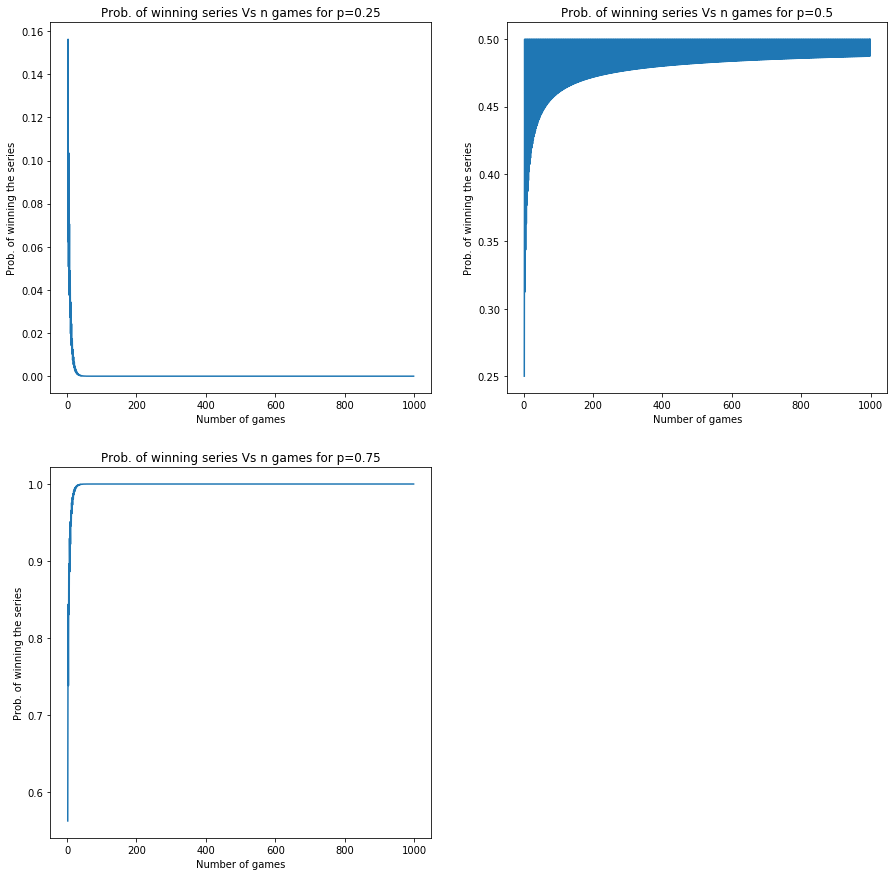

In [229]:
prob=[[],[],[]]
n_games=list(range(2,1000))
for game in n_games:
    prob[0].append(win_prob(game,0.25))
    prob[1].append(win_prob(game,0.5))
    prob[2].append(win_prob(game,0.75))
fig=plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(n_games,prob[0])
plt.xlabel('Number of games'),plt.ylabel('Prob. of winning the series'),plt.title("Prob. of winning series Vs n games for p=0.25")

plt.subplot(222)
plt.plot(n_games,prob[1])
plt.xlabel('Number of games'),plt.ylabel('Prob. of winning the series'),plt.title("Prob. of winning series Vs n games for p=0.5")

plt.subplot(223)
plt.plot(n_games,prob[2])
plt.xlabel('Number of games'),plt.ylabel('Prob. of winning the series'),plt.title("Prob. of winning series Vs n games for p=0.75")
fig.show()

From the figure above, we can see that as number of games in the league increases, the proability saturate to $1$ and $0$ for high and low winning probability $p$, respectively and it tends to 0.5 when $p=0.5$. 
### 2. Let's print their corresponding probability mass function PMF

C:\Users\Felix\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


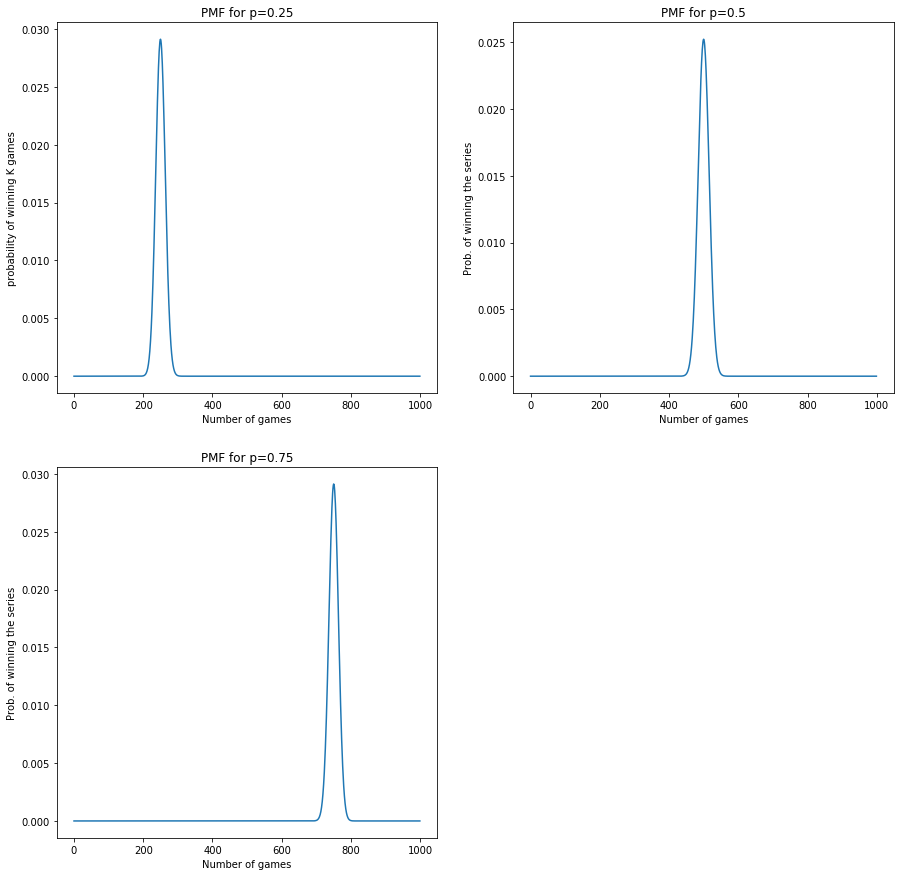

In [230]:
pmf=[[],[],[]]
n=1000
for k in range(n):
    ## Probility of wiining k games for p=o.25.0.5,0.75
    pk25= comb(n,k)*(0.25**k)*(0.75)**(n-k)
    pk5= comb(n,k)*(0.5**k)*(0.5)**(n-k)
    pk75= comb(n,k)*(0.75**k)*(0.25)**(n-k)
    pmf[0].append(pk25)
    pmf[1].append(pk5)
    pmf[2].append(pk75)
fig=plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(range(n),pmf[0])
plt.xlabel('Number of games'),plt.ylabel('probability of winning K games'),plt.title("PMF for p=0.25")

plt.subplot(222)
plt.plot(range(n),pmf[1])
plt.xlabel('Number of games'),plt.ylabel('Prob. of winning the series'),plt.title("PMF for p=0.5")

plt.subplot(223)
plt.plot(range(n),pmf[2])
plt.xlabel('Number of games'),plt.ylabel('Prob. of winning the series'),plt.title("PMF for p=0.75")
fig.show()


The above figure simply show that when $p$ is high, we will have right-skewed distribution, when it's low we get left-skewed distribution, and $0$ skewness for $p=0.5$.
## Question 7
Suppose two numbers are chosen at random from the range [0,1] according to a uniformdistribution. Suppose p is the probability that the ratio of the first number to the second number“rounds down” (floor) to an even number. Where the probability of the ratios will fall?
$p < 0.3; b. 0.3 ≤ p <0.4; c. 0.4 ≤ p <0.5; d. 0.5 ≤ p <0.6; e. 0.6 ≤ p <0.7; f 0.7 ≤ p$ \


### Answer:
To solve this problem,I will selec $2$ random numbers $A$ and $B$ from a uniform distribution and find their ratio $A/B$ (rounded to the floor). By the repeating this for $N$ iterations,I will get a distribution and find a probaility of even number from the distribution.\

#### Hypothesis:
As number of iterations we expect probability of even number will tend to its true probability.There, plotting this probability can show us the most probable value.

In [231]:
def prob_even (n_iter):
    ratio_distr=[]# distribution formed by ratio of the first number to the second
    for i in range(n_iter):
        a, b=uniform(),uniform()## selecting two random numbers 
        r=floor(a/b) ## ratio of two selected numbers
        ratio_distr.append(r)
    n_even=0
    for ratio in ratio_distr:
        if ratio %2 ==0:
            n_even=n_even+1
    prob= n_even/len(ratio_distr)
        
    return prob
print("Probability of even ration for 10 iteration = :",prob_even(50))
print("Probability of even ration for 100 iteration = :",prob_even(100))
print("Probability of even ration for 1000 iteration = :",prob_even(1000))

Probability of even ration for 10 iteration = : 0.72
Probability of even ration for 100 iteration = : 0.7
Probability of even ration for 1000 iteration = : 0.663


##### Let's find probability of the ratio being even number from the plot and by calculating the mean value from different distribution 

 Average probability of even number = 0.6534633973193652


C:\Users\Felix\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


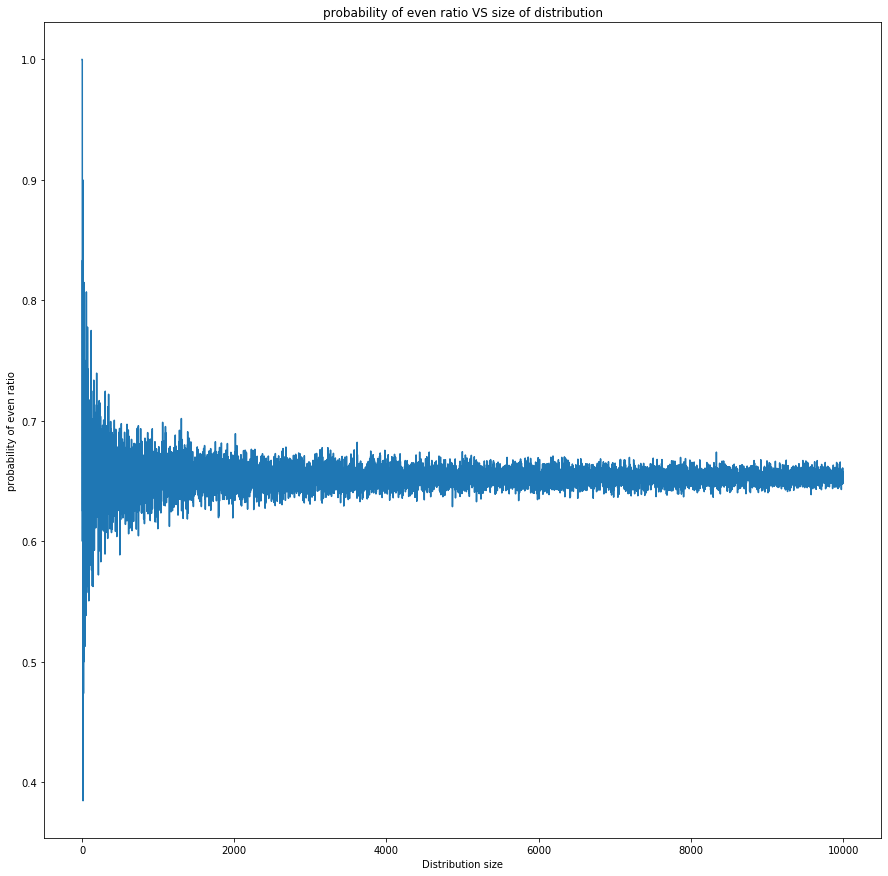

In [232]:
ratio_probs= []
max_iter= 10000
for i in range(1,max_iter):
    ratio_probs.append(prob_even(i))

print(" Average probability of even number =", np.mean(np.asarray(ratio_probs)))  
fig=plt.figure(figsize=(15,15))
plt.plot(range(1,max_iter),ratio_probs)
plt.xlabel('Distribution size'),plt.ylabel('probability of even ratio'),plt.title("probability of even ratio VS size of distribution")
fig.show()

From the above figure we can see that the probability of the ratio being even saturates to $0.6 ≤ p <0.7$ with average value 
equal to $P= 0.65$

### Question 8
Let us assume that the test scores an entrance exam fits a normal distribution where the mean test score is $76$, and the standard deviation is $23.7$. Calculate the percentage of students scoring $80$ or more in the exam?\

### Answer: 

##### Given: $\mu = 76$ and $σ=23.7$
For simply simplicity I will assume that test scores are postive.\
Nomal distribution pdf is given by: $f(x)=\frac{1}{\sqrt{2*\pi*σ^2}} *e^- \frac{(x-\mu)^2}{2*σ^2}$ \
Percentage of student scoring $80$ or more is equal to $P(X>80) = 1-P(X<80)$\
$P(X<80) = \int\limits_{0}^{80}f(x)dx$\
#### Let's find this integral using python and calulate the probability of score >80

In [233]:
sigma=23.7
mu=76
def cdf_func(x):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ) # This our normal disrtibution function
ans,err=quad(cdf_func,0,80)
print(" Probality for score < 80 =",ans)
print(" Probality for score < 80 =",1-ans)


 Probality for score < 80 = 0.5663425121219063
 Probality for score < 80 = 0.43365748787809366


### Question 9
Suppose that A is an event such that Pr(A) = 0 and that B is any other event. Prove that A and Bare independent events.
### Answer:
Since $Pr(A)=0$, it means event $A$ is an impossible event, so the occurence of event $B$ does not depend on event $A$. This is enough to prove that $A$ and $B$ are independent but let prove it mathematically. \
Event $A$ and $B$ are independent if joint probability $P(A,B)=P(A)P(B)$  which becomes $P(A,B)=0*P(B)= 0$
$(A,B)=P(A\B)P(B)=P(B\A)P(A)$===> $P(A,B)= 0*P(B)=0*P(B\A)=0$\
Therefore since $P(A,B)=P(A)P(B)=0$, the two events are independent. 
'

#### Question 10
Suppose that the p.d.f. of a random variable X is: - $f(x)=cx^2for1≤x≤2$;0 otherwise, \
a) What is the value of constant c?
b) Sketch the p.d.f. - Pr(X > 3/2) =?\
c) Suppose that the random variable X has a uniform distribution on interval [0, 1]. Randomvariable Y has a uniform distribution on the interval [4, 10]. X and Y are independent.\
d) Suppose a rectangle is to be constructed for which the lengths of two adjacent sides areX and Y. So, what is the expected value of the area of this rectangle?\
e)Suppose that X is a random variable. If E(X) = μ, Var(X) = σ 2 , then what is the value ofE[X(X − 1)] =?

### Answer:
##### Given: 
$𝑓(𝑥)=𝑐𝑥^2𝑓𝑜𝑟1≤𝑥≤2 ;0  otherwise$

#### $a$.
To find the value c, we integrate the pdf function from $1$ to $2$ and equate it $1$ due to the fact that integral of pdf function in entire interval equals to $1$\

 $\int\limits_{1}^{2}f(x)dx = \int\limits_{1}^{2}𝑐𝑥^2dx = 1$ \
 $===> \int𝑐𝑥^2dx= \frac{c}{3}x^3$
 Calculating the value of the above integral in interval $[1.2]$ gives us the value $c=\frac{3}{7}$ \
#### $ b.$ 
$Pr(X>\frac{3}{2})$ is given by the area under the curve of pdf function plot within interval $[\frac{3}{2},1]$. 
This is equivalent to the integral of pdf function in the same interval.
Let's plot and shade the area equals to $Pr(X>\frac{3}{2})$
 


 P(X>3/2) = 0.6607142857142857


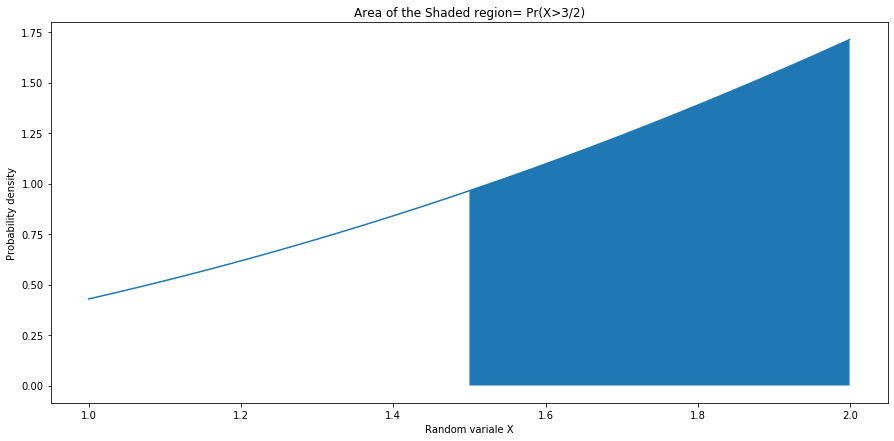

In [234]:
def pdf(x):
    return (3/7)*x**2 # This our normal disrtibution function

pr_x,err=quad(pdf,1.5,2) ## definite integral between 1.5 and 2

print(" P(X>3/2) =",pr_x)

x, area =np.arange(1,2 ,0.001),np.arange(1.5,2 ,0.001)
pdf_x =pdf(x) ## Pdf function over entire interval
pdf_area=pdf(area) ## pdf over interval (1.5,2)

fig=plt.figure(figsize=(15,7))
plt.plot(x, pdf_x)
plt.fill_between(area,pdf_area)
plt.title('Area of the Shaded region= Pr(X>3/2)'),plt.ylabel('Probability density'),plt.xlabel("Random variale X")
plt.show()

#### $c. $
I am confused what the question is here but I will assume that $c$ is part of $d$
#### $d.$ 
If $X$ and $Y$ are independent, then $E[XY]=E[X]E[Y]$\
Expected area $A$ will be $E[A]=E[XY]=E[X]E[Y]$\

For a uniform distribution, expectation of a random variable $t$ defined in $[a,b]$ is given by $E[t]=\frac{b+a}{2}$,  
Therefore, for random variables $X$and $Y$ $E[X] = \frac{1+0}{2}=\frac{1}{2}$ , and $E[Y]=\frac{4+10}{2}=7$\
$===>$ Expected area, $E[A]=E[X][Y]=7*\frac{1}{2}=\frac{7}{2}$ \

#### $e.$
Given:
$E[X]=\mu$, $VAR(X)=\sigma^2=E[X^2]-\mu^2$\
$E[X(X-1]=E[X^2-X]=E[X^2]-E[X]$\
\
From variance formula, $E[X^2]=\sigma^2+\mu^2$
Replacing this value in our equation we get:\
$E[X(X-1]=\sigma^2+\mu^2-\mu $\
$===>$ $E[X(X-1]=\sigma^2+\mu(\mu-1) $

### Question 11

Imagine there are three boxes labeled A, B and C. Two of them are empty, and one contains aprize. Unfortunately, they are all closed and you don’t know where the prize is. You first pick abox at random, say box A. However, before you open it, box B is opened by someone, and yousee that it is empty. You have to make your final choice as to what box to open: A or C. Question: For each of the cases below, answer what box would you open so as to maximize thechances that the box you open contains the prize? Support your arguments by computing theprobability of the prize being in box A and C. Here are the three strategies according to which boxB was chosen to be opened:\
\
a)In this strategy if you first pick a box (in this case A) with a prize, then one of the other twoboxes is opened at random. On the other hand, if you first choose a box that has no prize,then the empty box that you did not pick is chosen.\
\
b)In this strategy it is just one of the two boxes that you did not pick is chosen at random (in this case it is a random choice between B and C)\
\
c) this strategy one of empty boxes is chosen at random (independently of whether youinitially pick a box with a prize or not)

### Answer 
#### $1.$ 1st strategy:
 If box $A$ contains a prize, switching to another box  you don't get a prize 2 out 3 times since box B and C are empty. So, $P(A)= 2/3$ (chance of winning if you open A) and $P(C)= 1/3$ (chance of winning if you open C)
 
 $===>$ To maximize the chance of winning the price, I will open box A (staying with my initial choice)
 
 #### $2.$ 2nd strategy:
 In this case assuming that box B contains price, then box $C$ will be open. So if you open A you lose, similary if box $c$ contains prize, then $B$ will be will be selected and then if you open $A$ (stay with initial choice)  you lose. Therefore probability of winning if you switching to another box is $P(C)=2/3$.
 
 
 $===>$ To maximize the chance of winning the price, I will open box C (another box)

#### $2.$ 3rd strategy:
Since the choice of empty box is random and independent of content of my box, the each box is likely to have a price with probability of 1/3. So the chance that the price is box A is p(A)=1/3 and chance that price is another box either B or c is =p(B)+P(B)=2/3

$===>$ To maximize the chance of winning the price, I will choose box C (another box))
 
 


